In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_classes = 10

In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()

In [4]:
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


6
255


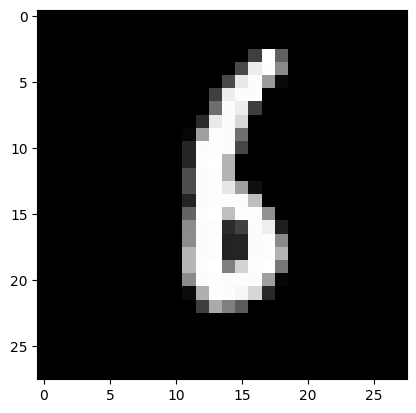

In [5]:
example = trainX[1100]
print(trainY[1100])
print(np.max(example))
plt.imshow(example, cmap = 'gray')

In [6]:
trainX = trainX/255
testX = testX/255

6


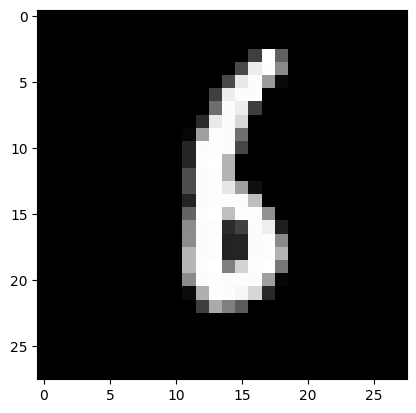

In [7]:
example = trainX[1100]
print(trainY[1100])
plt.imshow(example, cmap = 'gray')

In [8]:
np.max(example)

1.0

In [9]:
print(trainX.shape)

(60000, 28, 28)


In [10]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [11]:
print(trainX.shape)

(60000, 28, 28, 1)


In [12]:
trainY[0]

5

In [13]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [14]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
img_shape = (28, 28, 1)

In [16]:
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(40, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
#     keras.layers.Conv2D(160, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
#     keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
#     keras.layers.Conv2D(320, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'), 
#     keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 40)        7240      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 80)        28880     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 80)        0

In [18]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy', 'Recall', 'Precision'])

In [19]:
hist = model.fit(trainX, trainY, batch_size=500, epochs = 15)

Epoch 1/15
120/120 [==============================] - 152s 1s/step - loss: 0.3531 - accuracy: 0.9076 - recall: 0.8696 - precision: 0.9529
Epoch 2/15
120/120 [==============================] - 153s 1s/step - loss: 0.0540 - accuracy: 0.9832 - recall: 0.9814 - precision: 0.9855
Epoch 3/15
120/120 [==============================] - 159s 1s/step - loss: 0.0396 - accuracy: 0.9875 - recall: 0.9865 - precision: 0.9889
Epoch 4/15
120/120 [==============================] - 160s 1s/step - loss: 0.0277 - accuracy: 0.9911 - recall: 0.9902 - precision: 0.9922
Epoch 5/15
120/120 [==============================] - 163s 1s/step - loss: 0.0226 - accuracy: 0.9927 - recall: 0.9921 - precision: 0.9933
Epoch 6/15
120/120 [==============================] - 167s 1s/step - loss: 0.0200 - accuracy: 0.9938 - recall: 0.9933 - precision: 0.9943
Epoch 7/15
120/120 [==============================] - 159s 1s/step - loss: 0.0154 - accuracy: 0.9949 - recall: 0.9945 - precision: 0.9953
Epoch 8/15
120/120 [==============


KeyboardInterrupt

